## Importando as bibliotecas necessárias para o desenvolvimento

Importando as bibliotecas necessárias para o desenvolvimento

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# TO DO: Importar biblioteca de LogisticRegression do sklearn
from sklearn.linear_model import LogisticRegression


# Making the confusion Matrix
from sklearn.metrics import confusion_matrix

# Bibliotecas de vizualização de dados
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

print(pd.__version__)
print(np.__version__)

1.3.5
1.21.6



## Realizando a carga dos dados


In [ ]:
# TO DO: Realizar a carga dos dados do arquivo titanic.csv
titanic = pd.read_csv('titanic.csv')

In [ ]:
titanic.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [ ]:
#Análise Exploratória dos Dados
# TO DO: Apresentar informações estatísticas descritivas do dataste
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
pclass,1309.0,2.294882,0.837836,1.0000,2.0000,3.0000,3.000,3.0000
age,1046.0,29.881135,14.413500,0.1667,21.0000,28.0000,39.000,80.0000
sibsp,1309.0,0.498854,1.041658,0.0000,0.0000,0.0000,1.000,8.0000
parch,1309.0,0.385027,0.865560,0.0000,0.0000,0.0000,0.000,9.0000
fare,1308.0,33.295479,51.758668,0.0000,7.8958,14.4542,31.275,512.3292
survived,1309.0,0.381971,0.486055,0.0000,0.0000,0.0000,1.000,1.0000


## Início da Análise Exploratória de Dados


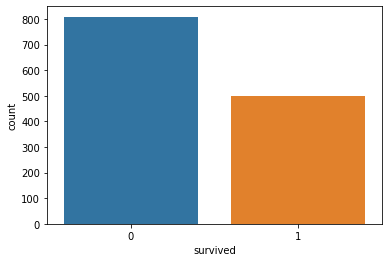

In [ ]:
distribution = sns.countplot(x='survived', data = titanic)

In [ ]:
# Apagando os atributos que não interessam a modelagem
# TO DO: Realizar a exclusão dos atributos (colunas) 'name', 'ticket' e 'cabin'

titanic.drop(labels=['name', 'ticket', 'cabin'], axis=1, inplace=True)

In [ ]:

titanic.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,29.0000,0,0,211.3375,S,1
1,1,male,0.9167,1,2,151.5500,S,1
2,1,female,2.0000,1,2,151.5500,S,0
3,1,male,30.0000,1,2,151.5500,S,0
4,1,female,25.0000,1,2,151.5500,S,0


## Resolver valores ausentes - Missing Values 

In [ ]:
#Identifcando valores ausentes 
print('-- Antes do tratamento --')
print(titanic.isnull().sum())

print(titanic['pclass'].count())

# possibilidade 1 - Apagar os registros que contém valores ausentes
# TO DO: Realizar a exclusão dos registros com valores ausentes b
titanic = titanic.dropna(subset=['fare', 'embarked'])
median = titanic["age"].median()
titanic["age"].fillna(median, inplace=True)


-- Antes do tratamento --
pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
survived      0
dtype: int64
1309


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
print('-- Depois do tratamento --')
print(titanic.isnull().sum())

-- Depois do tratamento --
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64


In [ ]:
print('-- Informações sobre o dataset --')
titanic.info()

-- Informações sobre o dataset --
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   int64  
 1   sex       1306 non-null   object 
 2   age       1306 non-null   float64
 3   sibsp     1306 non-null   int64  
 4   parch     1306 non-null   int64  
 5   fare      1306 non-null   float64
 6   embarked  1306 non-null   object 
 7   survived  1306 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 91.8+ KB


## Substituindo os valores categóricos (nominais) por valores numéricos

A função get_dummies do pacote pandas converte variáveis categóricas em variáveis dummy / indicadoras.




In [ ]:
#Substituindo os valores categóricos (nominais) por valores numéricos - Dummy encoding
titanic = pd.get_dummies(titanic)

In [ ]:
titanic.head()

,pclass,age,sibsp,parch,fare,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,29.0000,0,0,211.3375,1,1,0,0,0,1
1,1,0.9167,1,2,151.5500,1,0,1,0,0,1
2,1,2.0000,1,2,151.5500,0,1,0,0,0,1
3,1,30.0000,1,2,151.5500,0,0,1,0,0,1
4,1,25.0000,1,2,151.5500,0,1,0,0,0,1


In [ ]:
from IPython.display import display

#Usando o método loc com lógica booleana. Pegando todas as colunas diferentes de "survived"
X = titanic.loc[:,titanic.columns!="survived"].values
y = titanic.iloc[:, 5].values

display(X)
display(y)

array([[ 1.    , 29.    ,  0.    , ...,  0.    ,  0.    ,  1.    ],
       [ 1.    ,  0.9167,  1.    , ...,  0.    ,  0.    ,  1.    ],
       [ 1.    ,  2.    ,  1.    , ...,  0.    ,  0.    ,  1.    ],
       ...,
       [ 3.    , 26.5   ,  0.    , ...,  1.    ,  0.    ,  0.    ],
       [ 3.    , 27.    ,  0.    , ...,  1.    ,  0.    ,  0.    ],
       [ 3.    , 29.    ,  0.    , ...,  0.    ,  0.    ,  1.    ]])

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
#Separação do dataset em treinamento e tests
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=0)

## Feature Scaling

Uma das transformações mais importantes que você precisa aplicar aos seus dados é o dimensionamento de recursos (feature scaling). Com poucas exceções, os algoritmos de Aprendizado de Máquina não apresentam bom desempenho quando os atributos numéricos de entrada possuem escalas muito diferentes. Este é o caso da habitação. Dados: o número total de salas varia de cerca de 6 a 39.320, enquanto a renda média varia apenas de 0 a 15. Observe que o escalonamento dos valores-alvo geralmente não é necessário.

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

display(X_train)
display(X_test)

array([[ 0.84659625, -1.10273104, -0.48673952, ..., -0.51146646,
        -0.32782017,  0.6615072 ],
       [ 0.84659625, -0.86218878,  0.48973177, ..., -0.51146646,
        -0.32782017,  0.6615072 ],
       [-1.52823966,  0.500884  , -0.48673952, ..., -0.51146646,
        -0.32782017,  0.6615072 ],
       ...,
       [ 0.84659625,  0.01979949, -0.48673952, ..., -0.51146646,
        -0.32782017,  0.6615072 ],
       [-0.3408217 ,  2.34504128, -0.48673952, ..., -0.51146646,
        -0.32782017,  0.6615072 ],
       [ 0.84659625, -0.62164653, -0.48673952, ..., -0.51146646,
         3.05045294, -1.51169934]])

array([[ 0.84659625, -2.31880844, -0.48673952, ..., -0.51146646,
        -0.32782017,  0.6615072 ],
       [-0.3408217 ,  0.34052249,  0.48973177, ..., -0.51146646,
        -0.32782017,  0.6615072 ],
       [-0.3408217 , -0.86218878, -0.48673952, ..., -0.51146646,
        -0.32782017,  0.6615072 ],
       ...,
       [ 0.84659625, -1.6639963 , -0.48673952, ..., -0.51146646,
        -0.32782017,  0.6615072 ],
       [ 0.84659625,  0.6612455 ,  0.48973177, ..., -0.51146646,
        -0.32782017,  0.6615072 ],
       [ 0.84659625, -0.22074277, -0.48673952, ..., -0.51146646,
        -0.32782017,  0.6615072 ]])

## Criando o classificador de Logistic Regression para o conjunto de treinamento 


In [ ]:
# TO DO: Instanciar um classificador para Regressão Logística (Logistic Regression)
#Parametros para o classificador random_state=0 e solver='lbfgs'
classifier = LogisticRegression(random_state=0, solver='lbfgs')

# Trainando o modelo
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Prevendo alguns valores com o conjunto de dados de teste

#Sem indicação de probabilidade
y_pred = classifier.predict(X_test) 
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

## Criando uma Matriz de Confusão para analisar o resultado da previsão feita pelo modelo

Podemos resumir nosso modelo de "predição de lobo" usando uma matriz de confusão 2x2 que descreve TO DOs os quatro resultados possíveis:

> Um verdadeiro positivo (TP) é um resultado em que o modelo prevê corretamente a classe positiva. Da mesma forma, um verdadeiro negativo é um resultado em que o modelo prevê corretamente a classe negativa.

> Um falso positivo (FP) é um resultado em que o modelo prevê incorretamente a classe positiva. E um falso negativo é um resultado em que o modelo prediz incorretamente a classe negativa.

In [ ]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[179,  24],
       [ 37,  87]])

## Verificando a acurácia do modelo utilizado

Precisão é uma métrica para avaliar modelos de classificação. Informalmente, a precisão é a fração de previsões que nosso modelo acertou. 

In [ ]:
# Acurácia do Logistic Regression

from sklearn.metrics import accuracy_score

for clf in (classifier,):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8134556574923547
